In [1]:
import xarray as xr
import numpy as np

In [2]:
xr.set_options(display_style="text")

In [3]:
Lx = 10
Ly = 20
Lt = 365
slope = 1.0
noise_level = 5.0
intercept = 27.0

data = xr.DataArray(
    noise_level * np.random.normal(size=(Lt, Ly, Ly))
    + slope * np.arange(Lt)[:, np.newaxis, np.newaxis]
    + intercept,
    dims=("t", "y", "x"),
    coords={"t": ("t", np.arange(Lt) * np.timedelta64(1, "D") + np.datetime64("2001-01-01"))}
)

data

<xarray.DataArray (t: 365, y: 20, x: 20)>
array([[[ 25.47815617,  35.37757475,  32.82431105, ...,  28.70751504,
          28.69157025,  24.79863483],
        [ 23.58698143,  23.57214269,  35.13691162, ...,  31.6638816 ,
          28.53569078,  29.66949165],
        [ 25.9046114 ,  21.92892489,  40.61361534, ...,  31.39534792,
          31.36120172,  22.25652247],
        ...,
        [ 36.22387893,  24.37921054,  25.51509297, ...,  25.68765979,
          29.3644184 ,  27.37719884],
        [ 17.2353467 ,  24.71367013,  27.97928719, ...,  30.01317485,
          21.67450259,  33.19589848],
        [ 19.16248958,  28.05899782,  28.83010421, ...,  29.40298019,
          26.44644795,  27.45821154]],

       [[ 24.34933097,  23.57542846,  40.03832268, ...,  29.99010675,
          31.762851  ,  13.26422028],
        [ 27.0236488 ,  37.88375735,  25.21950896, ...,  29.14527379,
          35.94366858,  29.40038713],
        [ 25.55042063,  28.16758139,  28.48456718, ...,  41.35933715,
          35.55078462,  27.76794432],
        ...,
        [ 35.81935868,  23.14980027,  35.85389125, ...,  25.37315526,
          20.74455029,  31.05593336],
        [ 23.21888235,  30.76952096,  11.89249107, ...,  32.27480253,
          29.51862867,  29.33996532],
        [ 23.42549993,  26.92416696,  31.2406502 , ...,  20.61313022,
          21.51343512,  14.07847742]],

       [[ 22.72147   ,  16.09210031,  14.44308085, ...,  24.0976536 ,
          22.58963212,  27.3845125 ],
        [ 25.85241672,  24.34599919,  22.62896036, ...,  35.88125802,
          31.41717366,  33.38271025],
        [ 27.92663685,  33.02418199,  30.90341593, ...,  24.97682391,
          26.76787001,  29.50290092],
        ...,
        [ 27.62007066,  29.34353901,  23.01979024, ...,  26.42292149,
          24.54558421,  21.11228778],
        [ 26.41202698,  33.02347693,  41.07928443, ...,  29.37908179,
          39.46550496,  26.77960919],
        [ 24.91359427,  36.80960352,  28.59181947, ...,  27.2886211 ,
          21.36910837,  36.68221013]],

       ...,

       [[384.25720647, 395.25758325, 396.2435771 , ..., 387.47956602,
         375.86666265, 396.44550253],
        [391.85856949, 396.46438709, 387.50456384, ..., 391.68694383,
         389.39772642, 389.88406761],
        [388.76701859, 390.78070094, 384.70444866, ..., 390.0079999 ,
         394.72619246, 392.87791915],
        ...,
        [391.63765103, 388.91459861, 388.23975058, ..., 386.64969467,
         390.9721525 , 387.95259148],
        [400.06211933, 385.46766523, 380.69874968, ..., 387.09207382,
         378.80329034, 391.93419322],
        [384.08886378, 379.57020952, 385.85727736, ..., 391.69421641,
         381.07950474, 389.95618112]],

       [[391.80412457, 389.7730195 , 395.53333554, ..., 395.15593942,
         393.82872051, 389.60306039],
        [384.5122795 , 386.81254704, 397.48860605, ..., 392.67671657,
         399.45918081, 392.81967744],
        [397.89070764, 393.43101044, 395.34975955, ..., 384.74474268,
         388.93290932, 378.92175285],
        ...,
        [391.48366924, 393.99318294, 392.95628888, ..., 385.46251304,
         389.38408533, 394.40280051],
        [389.70501327, 381.90792735, 388.15101692, ..., 390.57733209,
         396.71862239, 386.80393805],
        [386.79869835, 386.17268548, 398.99432415, ..., 386.26517188,
         395.92235559, 395.32288404]],

       [[397.7709067 , 393.39432808, 394.0405853 , ..., 389.52873038,
         388.52174473, 390.85969083],
        [398.04851861, 384.54001417, 391.31457529, ..., 388.43524302,
         393.6448606 , 396.936931  ],
        [397.36092498, 393.37314486, 396.12312173, ..., 382.55049127,
         393.76440892, 389.10775073],
        ...,
        [384.58236212, 391.44317349, 386.26530131, ..., 390.28009785,
         398.79847165, 390.35984868],
        [384.09912612, 393.7719925 , 388.87282618, ..., 398.03254843,
         390.10748687, 393.57546004],
        [394.09914292, 388.30780846, 389.47858306, ..., 390.00721588,
       

In [4]:
def xr_cov(d1, d2, dim=None):
    return (d1 * d2).mean(dim) - d1.mean(dim) * d2.mean()

In [5]:
def lin_reg_time(data, time_name="t"):
    # extract time axis and turn into seconds since the beginning of the data
    time_axis = data.coords["t"]
    time_axis_offset_seconds = (time_axis - time_axis.isel(t=0)) / np.timedelta64(1, "s")
    
    # slope is cov(y, x) / var(x)
    # note in newer xarray, there's xr.cov()
    # calc slope per second
    slope_per_second = (
        xr_cov(data, time_axis_offset_seconds, "t")
        / time_axis_offset_seconds.var("t")
    )

    intercept = (
        data.mean("t")
        - time_axis_offset_seconds.mean("t") * slope_per_second
    )

    return slope_per_second, intercept

In [6]:
slope_per_second, intercept = lin_reg_time(data, time_name="t")

In [7]:
slope_per_day = slope_per_second * (np.timedelta64(1, "s") / np.timedelta64(1, "D"))

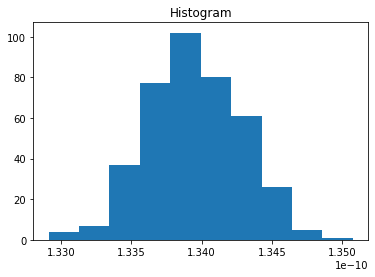

In [8]:
slope_per_day.plot.hist();

In [9]:
intercept

<xarray.DataArray (y: 20, x: 20)>
array([[26.34364018, 27.22071502, 26.65568499, 27.23540865, 26.85815714,
        26.90256877, 27.57386102, 26.75247318, 27.64957062, 27.25500544,
        26.798452  , 27.16286011, 26.75977954, 27.02544994, 27.60700288,
        26.7800072 , 27.76907115, 26.1009819 , 26.72550985, 27.41778902],
       [26.52318938, 27.08972596, 27.21216462, 26.95425914, 27.38470517,
        26.87719957, 27.21117165, 27.94431279, 27.01561201, 27.8811097 ,
        27.13666602, 27.68950562, 26.59561444, 27.67931588, 27.90271633,
        26.74861929, 26.59727423, 28.02634692, 26.62542573, 26.65399441],
       [27.86337786, 27.25184574, 27.21937504, 27.57207638, 26.16211839,
        26.45401835, 26.78426275, 26.51811438, 26.28697931, 26.7932959 ,
        26.65721571, 28.03621091, 27.76043375, 27.21040069, 27.15585461,
        26.47845966, 27.22379078, 26.7568448 , 27.07021603, 28.13984717],
       [27.34802849, 26.97726255, 27.36196806, 27.24258362, 27.06779363,
        26.29334678, 27.95056269, 27.29600019, 26.34248632, 26.29414909,
        25.99850358, 27.04138205, 27.02319103, 26.55205818, 27.24571372,
        26.99853088, 26.41255425, 27.6502263 , 27.83655583, 27.1916811 ],
       [27.02198268, 26.82595598, 26.0220565 , 26.85036398, 27.32106061,
        26.36934274, 27.1015685 , 28.24705069, 26.97956986, 27.47624451,
        27.42706467, 27.07284072, 27.67608634, 27.02852416, 27.37098861,
        28.06128798, 26.73091169, 27.06347837, 27.25279796, 27.17490267],
       [26.74230573, 26.86990614, 26.7510627 , 27.43836103, 26.39092547,
        27.11310248, 27.2325833 , 27.74326768, 26.78234073, 26.98251696,
        26.70013498, 27.46481113, 26.52188882, 27.27661222, 26.75120874,
        27.29946156, 27.67043198, 27.15375538, 26.79152284, 27.61414567],
       [27.12214558, 27.36982737, 27.57519915, 27.14301323, 28.01983653,
        27.20189595, 27.01179713, 27.36870879, 27.30978004, 26.49424038,
        26.55997462, 28.16196223, 26.75013491, 26.58123923, 26.99036449,
        26.8741312 , 27.62566923, 27.73362456, 25.93958544, 27.25898257],
       [27.37871476, 27.32093274, 27.72800359, 27.15220718, 26.91393612,
        27.33614688, 27.54713853, 27.73696781, 26.64336943, 27.13877628,
        26.69214195, 26.64312545, 27.18782203, 26.40680919, 27.15966317,
        26.5168727 , 26.3662917 , 27.14752314, 26.61037334, 27.38015799],
       [26.80800052, 27.85117767, 26.84918148, 26.65120918, 26.9072252 ,
        26.9506541 , 26.84274088, 26.00207683, 26.81472117, 28.19187811,
        27.08365843, 27.604304  , 26.84125588, 26.70449536, 27.10597071,
        26.63932076, 26.55615295, 27.67124529, 26.84112498, 28.00841296],
       [27.7109325 , 27.62490829, 26.68776578, 26.92754377, 27.50402459,
        27.65798331, 26.9557156 , 26.301003  , 27.24306933, 27.65233279,
        26.1876079 , 27.5810386 , 26.74637911, 26.84616307, 26.31532456,
        26.9031555 , 26.71175409, 27.22398402, 26.64588958, 27.09860288],
       [27.57912814, 27.38526302, 26.82446211, 26.80118685, 26.15932042,
        27.26039138, 26.90574965, 27.42945979, 26.63598369, 26.39947753,
        27.61773219, 27.27985903, 26.2494735 , 27.00990036, 26.7390066 ,
        26.88419604, 27.27232485, 27.35482808, 26.9054846 , 26.30141813],
       [27.06259335, 27.47421313, 27.08230848, 27.79772981, 27.29960563,
        27.48926307, 26.57280076, 26.96721343, 26.34384817, 27.58178872,
        27.15136877, 26.9602237 , 27.18715258, 26.38042426, 26.29590404,
        26.2816615 , 27.12655842, 26.51280279, 26.84029657, 26.52351657],
       [26.87242767, 27.33532497, 26.98539655, 27.33577588, 26.25964785,
        27.51166086, 28.02769376, 26.95542384, 26.9376848 , 26.10932729,
        27.72515735, 26.62013961, 27.65139008, 26.71121115, 26.81535675,
        26.61840611, 26.60947045, 26.81567901, 27.52965409, 27.41981153],
       [26.65990485, 27.14174435, 27.52976111, 26.96284869, 27.8283196 ,
        27.10149503, 27.39780361, 27.23498987, 27.04353007, 26.81422697,
        27.

(array([ 2.,  9., 24., 49., 83., 72., 76., 43., 30., 12.]),
 array([25.52167765, 25.79421495, 26.06675226, 26.33928956, 26.61182686,
        26.88436417, 27.15690147, 27.42943878, 27.70197608, 27.97451339,
        28.24705069]),
 <a list of 10 Patch objects>)

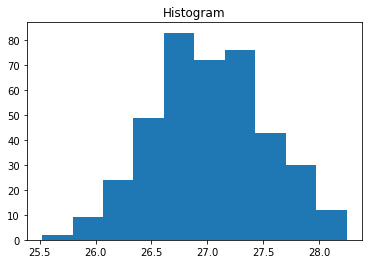

In [10]:
intercept.plot.hist()

In [11]:
# for vname in data_set.data_vars:
#     slp, intcpt = lin_reg_time(data_set[vname], time_name="t")
#     data_set[f"{vname}_slope"] = slp
#     data_set[f"{vname}_intercept"] = intcpt